In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns = ["Age", "Sex", "On Thyroxine", "Query on Thyroxine", 
           "On Antithyroid Medication", "Sick", "Pregnant", 
           "Thyroid Surgery", "I131 Treatment", "Query Hypothyroid", 
           "Query Hyperthyroid", "Lithium", "Goitre", "Tumor", 
           "Hypopituitary", "Psych", "TSH Measured", "TSH", "T3 Measured", 
           "T3", "TT4 Measured", "TT4", "T4U Measured", "T4U", 
           "FTI Measured", "FTI", "TBG Measured", "TBG", "Referral Source", "Category"]

In [3]:
hyper_data = pd.read_csv(r"C:\Users\hnrne\Downloads\allhyperdata.csv", names=columns)
hypo_data = pd.read_csv(r"C:\Users\hnrne\Downloads\allhypodata.csv", names=columns)
sick_data = pd.read_csv(r"C:\Users\hnrne\Downloads\sickdata.csv", names=columns)

In [4]:
hyper_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [5]:
hypo_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [6]:
sick_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,TBG Measured,TBG,Referral Source,Category
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [7]:
def parse_row(row):
    row = row.split(".")[0]
    return row

def to_hyperthyroid(row):
    if row != "negative":
        row = "hyperthyroid"
    return row

def to_hypothyroid(row):
    if row != "negative":
        row = "hypothyroid"
    return row

def convert_category(dataframe, column):
    
    if column == 'Sex':
        conditionF = dataframe[column] == 'F' # For sex column
        conditionT = dataframe[column] == 'M' # For sex column
    else:
        conditionF = dataframe[column] == 'f'
        conditionT = dataframe[column] == 't'
    
    dataframe.loc[conditionF, column] = 0
    dataframe.loc[conditionT, column] = 1

In [8]:
hyper_data['Category'] = hyper_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hyperthyroid)

hypo_data['Category'] = hypo_data['Category'] \
                            .apply(parse_row) \
                            .apply(to_hypothyroid)

sick_data['Category'] = sick_data['Category'] \
                            .apply(parse_row)

In [9]:
thyroid_frames = [hyper_data, hypo_data, sick_data]
thyroid_data = pd.concat(thyroid_frames) \
                 .drop_duplicates() \
                 .drop(['Referral Source', 'TBG', 'TBG Measured'], axis=1)

In [10]:
classes = thyroid_data['Category'].unique()
print(classes)

['negative' 'hyperthyroid' 'hypothyroid' 'sick']


In [11]:
thyroid_data

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,82,M,f,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
2776,79,M,f,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
2782,50,F,f,f,f,f,f,f,f,t,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
2786,73,?,f,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick


In [12]:
thyroid_data.shape

(3221, 27)

In [13]:
thyroid_data.dtypes

Age                          object
Sex                          object
On Thyroxine                 object
Query on Thyroxine           object
On Antithyroid Medication    object
Sick                         object
Pregnant                     object
Thyroid Surgery              object
I131 Treatment               object
Query Hypothyroid            object
Query Hyperthyroid           object
Lithium                      object
Goitre                       object
Tumor                        object
Hypopituitary                object
Psych                        object
TSH Measured                 object
TSH                          object
T3 Measured                  object
T3                           object
TT4 Measured                 object
TT4                          object
T4U Measured                 object
T4U                          object
FTI Measured                 object
FTI                          object
Category                     object
dtype: object

In [14]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 2796
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        3221 non-null   object
 1   Sex                        3221 non-null   object
 2   On Thyroxine               3221 non-null   object
 3   Query on Thyroxine         3221 non-null   object
 4   On Antithyroid Medication  3221 non-null   object
 5   Sick                       3221 non-null   object
 6   Pregnant                   3221 non-null   object
 7   Thyroid Surgery            3221 non-null   object
 8   I131 Treatment             3221 non-null   object
 9   Query Hypothyroid          3221 non-null   object
 10  Query Hyperthyroid         3221 non-null   object
 11  Lithium                    3221 non-null   object
 12  Goitre                     3221 non-null   object
 13  Tumor                      3221 non-null   object
 14  Hypopitu

In [15]:
thyroid_data=thyroid_data.replace('?',np.nan)

In [16]:
thyroid_data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,NaN,f,NaN,negative
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,NaN,t,109,t,0.91,t,120,negative
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,NaN,f,NaN,negative
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [17]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 2796
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        3220 non-null   object
 1   Sex                        3094 non-null   object
 2   On Thyroxine               3221 non-null   object
 3   Query on Thyroxine         3221 non-null   object
 4   On Antithyroid Medication  3221 non-null   object
 5   Sick                       3221 non-null   object
 6   Pregnant                   3221 non-null   object
 7   Thyroid Surgery            3221 non-null   object
 8   I131 Treatment             3221 non-null   object
 9   Query Hypothyroid          3221 non-null   object
 10  Query Hyperthyroid         3221 non-null   object
 11  Lithium                    3221 non-null   object
 12  Goitre                     3221 non-null   object
 13  Tumor                      3221 non-null   object
 14  Hypopitu

In [18]:
thyroid_data.isnull().sum()

Age                            1
Sex                          127
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH Measured                   0
TSH                          247
T3 Measured                    0
T3                           589
TT4 Measured                   0
TT4                          142
T4U Measured                   0
T4U                          276
FTI Measured                   0
FTI                          274
Category                       0
dtype: int64

In [19]:
thyroid_data.Age

0       41
1       23
2       46
3       70
4       70
        ..
2774    82
2776    79
2782    50
2786    73
2796    73
Name: Age, Length: 3221, dtype: object

In [20]:
thyroid_data['Age']=thyroid_data['Age'].astype(float)

In [21]:
thyroid_data.Age

0       41.0
1       23.0
2       46.0
3       70.0
4       70.0
        ... 
2774    82.0
2776    79.0
2782    50.0
2786    73.0
2796    73.0
Name: Age, Length: 3221, dtype: float64

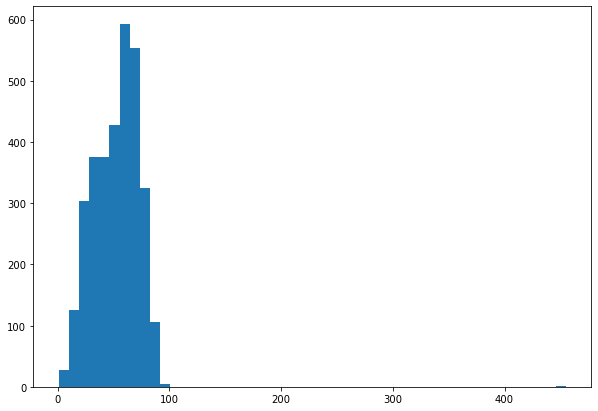

In [62]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data.Age,bins=50)
plt.show()

Here, from this histogram we can conclude that there is an outlier in age which is beyond value of 400.

In [28]:
thyroid_data=thyroid_data.convert_dtypes()

In [31]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 2796
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        3220 non-null   Int64 
 1   Sex                        3094 non-null   string
 2   On Thyroxine               3221 non-null   string
 3   Query on Thyroxine         3221 non-null   string
 4   On Antithyroid Medication  3221 non-null   string
 5   Sick                       3221 non-null   string
 6   Pregnant                   3221 non-null   string
 7   Thyroid Surgery            3221 non-null   string
 8   I131 Treatment             3221 non-null   string
 9   Query Hypothyroid          3221 non-null   string
 10  Query Hyperthyroid         3221 non-null   string
 11  Lithium                    3221 non-null   string
 12  Goitre                     3221 non-null   string
 13  Tumor                      3221 non-null   string
 14  Hypopitu

In [39]:

thyroid_data[["Age","T3","TSH","TT4", "T4U", "FTI"]]= thyroid_data[["Age", "T3","TSH","TT4", "T4U", "FTI"]].apply(pd.to_numeric)

I have converted the numerical columns to float values ,and kept string values as it is.

In [40]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 2796
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3220 non-null   Int64  
 1   Sex                        3094 non-null   string 
 2   On Thyroxine               3221 non-null   string 
 3   Query on Thyroxine         3221 non-null   string 
 4   On Antithyroid Medication  3221 non-null   string 
 5   Sick                       3221 non-null   string 
 6   Pregnant                   3221 non-null   string 
 7   Thyroid Surgery            3221 non-null   string 
 8   I131 Treatment             3221 non-null   string 
 9   Query Hypothyroid          3221 non-null   string 
 10  Query Hyperthyroid         3221 non-null   string 
 11  Lithium                    3221 non-null   string 
 12  Goitre                     3221 non-null   string 
 13  Tumor                      3221 non-null   strin

In [41]:
thyroid_data['Age']=thyroid_data['Age'].astype(float)

In [42]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 2796
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3220 non-null   float64
 1   Sex                        3094 non-null   string 
 2   On Thyroxine               3221 non-null   string 
 3   Query on Thyroxine         3221 non-null   string 
 4   On Antithyroid Medication  3221 non-null   string 
 5   Sick                       3221 non-null   string 
 6   Pregnant                   3221 non-null   string 
 7   Thyroid Surgery            3221 non-null   string 
 8   I131 Treatment             3221 non-null   string 
 9   Query Hypothyroid          3221 non-null   string 
 10  Query Hyperthyroid         3221 non-null   string 
 11  Lithium                    3221 non-null   string 
 12  Goitre                     3221 non-null   string 
 13  Tumor                      3221 non-null   strin

In [43]:
thyroid_data.describe()

,Age,TSH,T3,TT4,T4U,FTI
count,3220.000000,2974.000000,2632.000000,3079.000000,2945.000000,2947.000000
mean,52.532609,6.722840,1.963355,107.807665,0.989937,110.657550
std,20.381326,27.585818,0.928773,38.941172,0.194417,37.578197
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.450000,1.500000,86.000000,0.870000,92.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000
75%,68.000000,3.300000,2.300000,125.000000,1.080000,125.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


These shows the data information like mean , max value, min value etc...

In [63]:
thyroid_data.corr()

,Age,TSH,T3,TT4,T4U,FTI
Age,1.000000,-0.076631,-0.251273,-0.060948,-0.189604,0.028542
TSH,-0.076631,1.000000,-0.176044,-0.289527,0.085338,-0.321130
T3,-0.251273,-0.176044,1.000000,0.601815,0.435980,0.429994
TT4,-0.060948,-0.289527,0.601815,1.000000,0.371222,0.833907
T4U,-0.189604,0.085338,0.435980,0.371222,1.000000,-0.172715
FTI,0.028542,-0.321130,0.429994,0.833907,-0.172715,1.000000


These are correlation between the numerical columns. 

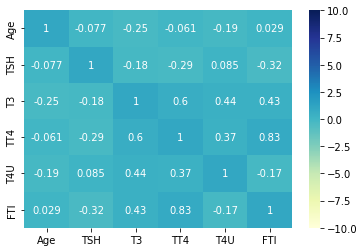

In [66]:
ax = sns.heatmap(thyroid_data.corr(), annot=True ,vmax=10, vmin=-10, center=0, cmap="YlGnBu",linecolor='black')

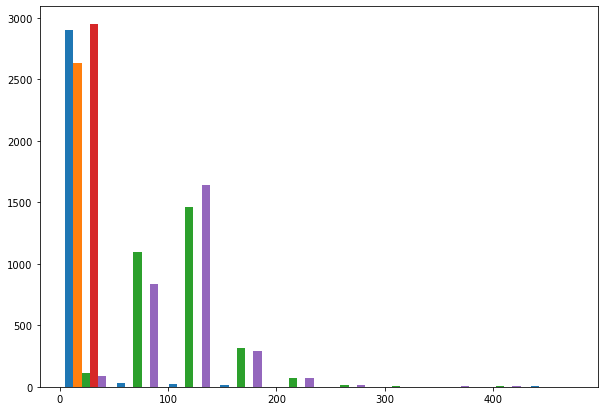

In [78]:
plt.subplots(figsize=(10,7))
plt.hist(thyroid_data[['TSH','T3','TT4','T4U','FTI']],bins=10)
plt.show()

We have plotted histogram of all numerical columns , as we can see there is outlier in tsh,tt4,fti